# Taller de Investigación
## Trabajando con la simulación semianalitica mini

La idea inicial, lectura de archivos, calculo de distrancia entre halos e identificación de las caracteristicas del ambiente. 

In [4]:
import numpy as np
import h5py                                      #que pasa con hdf5? 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Lectura de archivos
Primero la lectura de datos: A continuación solo llama columnas de ID, X, Y, Z (trabajo con la pato)

In [5]:
datos = np.genfromtxt("DATA/sussing_125.z0.000.AHF_halos", usecols=[0,5,6,7], names=True)
#datos

Clase de lectura de archivos, donde se requieren las columnas iniciales de interes de los archis, se lee el tipo hdf5 y se guarda la información asociada a un halo en particular. 

In [6]:
class read_file: 
    
    def __init__(self, path, file, columns=None):
        if columns is not None:
            self.cols = columns
        else:
            self.cols     = [0, 1, 2, 3, 5, 6, 7]                #ID, hosthalo, substruc, masa y posiciones xyz
            
        self.path = path; self.file = file; self.read()
        
    def read(self):
        if self.file == "*.hdf5":
            print("No se ha hecho esta parte")
        else:
            data = np.genfromtxt(str(self.path+self.file), usecols = self.cols, names=True)   
            self.data = np.array([list(row) for row in data])#para poder hacer slicing
            
    def halo_info(self, index, info=False): 
        self.hinfo = self.data[index]
        return(self.hinfo)

Ejemplo de lectura de archivos

In [7]:
sussing_125 = read_file("DATA/", "sussing_125.z0.000.AHF_halos")
#sussing_125.halo_info(10)[4:]

Ahora se realizan calculos de distancia y velocidades. 

In [8]:
class kinetic:                                   #cinematica entre dos halos
    
    def __init__(self, halo1, halo2):            #halo1 y halo22 son objetos de read_file (halo_info)  
        self.halo1 = halo1; self.halo2 = halo2     

    def distance(self): 
        posA = self.halo1[4:]; posB = self.halo2[4:]
        return(np.linalg.norm(posA-posB))
    
    #def velocity(self, , halo2): 
        #return(np.linalg.norm(halo1-halo2))
    
#preguntal al profe sobre los cambios que sugirió.

In [9]:
distancia = kinetic(sussing_125.halo_info(15), sussing_125.halo_info(20))#.distance()
distancia.distance()

1519.0730809620231

### Tarea I: gráfica de halos vs masa
Primero, vamos como es para el ultimo de l snapshots de la sumulación: os 

In [10]:
datos = sussing_125.data[sussing_125.data[:,1] == 0] 

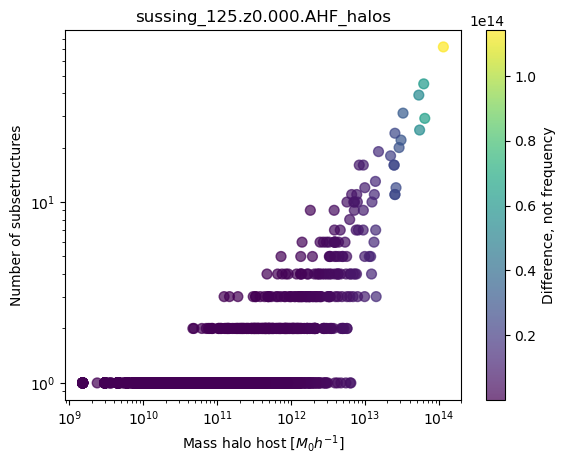

In [11]:
dis = np.sqrt(datos[:,3]**2 + datos[:,2]**2)

fig, ax = plt.subplots()
plt.xscale('log'); plt.yscale('log')
ax.set_xlabel(r'Mass halo host [$M_{0}h^{-1}$]')
ax.set_ylabel("Number of subsetructures")
ax.set_title('sussing_125.z0.000.AHF_halos')
scatter = ax.scatter(datos[:,3], datos[:,2], c=dis, s=50, alpha=0.7)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Difference, not frequency')

plt.show()

Teniendo en cuenta todos los archivos y snapshots en la simulación. 

In [12]:
import glob #La idea es leer todos los datos de la mini
archivos = glob.glob('DATA/'+'sussing*.z0.*_halos*')
archivos = [archivo.replace('DATA/', '') for archivo in archivos]

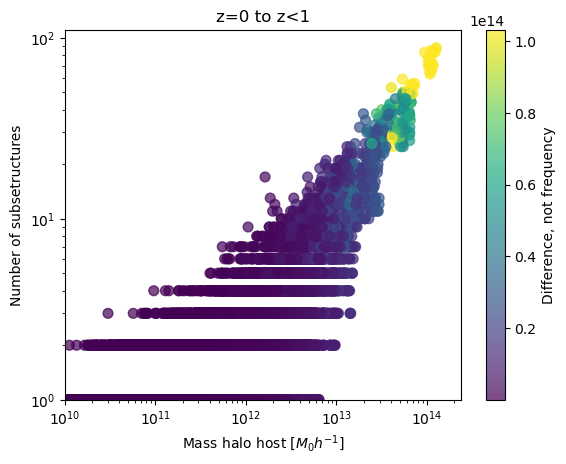

In [13]:
fig, ax1 = plt.subplots()

column_width = 1e1

for i in range(len(archivos)):
    j = read_file('DATA/', archivos[i])
    j = j.data[j.data[:,1] == 0] 

    dist = np.sqrt(j[:,3]**2 + j[:,2]**2)
    scatter = ax1.scatter(j[:,3], j[:,2], c=dist, cmap='viridis', s=50, marker='o', alpha=0.7)

ax1.set_xlabel(r'Mass halo host [$M_{0}h^{-1}$]')
ax1.set_ylabel("Number of subsetructures")
ax1.set_title('z=0 to z<1')
plt.xscale('log'); plt.yscale('log')

plt.xlim(1e10,)
plt.ylim(1,)

cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Difference, not frequency')
plt.show()

### Tarea plot hist 2d 

In [14]:
from matplotlib import rcParams, colors, ticker, cm

#valores de masa y numero de miembros
#ejeX = datos[:,3]; ejeY = datos[:,2]
ejeX = j[:,3]; ejeY = j[:,2]

In [15]:
#limites del histograma
xr = [9,15]; yr = [0, 20]
# Solo considera valores positivos
nz = (ejeX>0)&(ejeY>0)

In [16]:
#se define el histograma 2D
H, xedges, yedges = np.histogram2d(np.log10(ejeX[nz]),
                                   np.log10(ejeY[nz]), 
                                   range=[xr,yr], 
                                   bins=80)

#enmascara el histograma (centra cada bin)
H = np.ma.masked_where(H<=0, H)
x = (xedges[1:]+xedges[:-1])/2
y = (yedges[1:]+yedges[:-1])/2

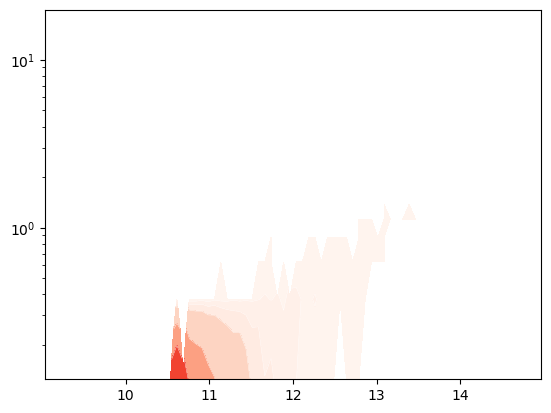

In [17]:
fig, ax = plt.subplots(1,1)

X,Y = np.meshgrid(x,y)
hist2D = H.T/(xedges[1]-xedges[0])/(yedges[1]-yedges[0])
   
    
levels = np.array([0.001, 0.02, 0.05, 0.1, 0.3, 0.5, 0.95, 0.997])
ticks = levels*hist2D.max()
    
    
#if not levels:
#    levels = ContourLevels
#ticks = levels*hist2D.max()

# filled areas:
cs = ax.contourf(X, Y, hist2D, ticks, cmap=cm.Reds, zorder=1,
                 norm=colors.Normalize(vmin=0.0001*hist2D.max(), 
                                       vmax=1.2*hist2D.max()))
# white lines:
cs = ax.contour(X, Y, hist2D, ticks, colors='white', 
                linewidths=0.3, zorder=1, 
                norm=colors.Normalize(vmin=0.0001*hist2D.max(), 
                                      vmax=1.2*hist2D.max()))
plt.yscale('log')